In [1]:
%matplotlib inline
import matplotlib
import pandas as pd
import emsalib as emsa
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal, interpolate,fftpack
import csv

In [2]:
dataset_path = 'data/Alice.csv'
header = pd.read_csv(dataset_path, nrows=1, header=None)
header = header.values[0]
alice = pd.read_csv(dataset_path)

In [9]:
ts = alice['Timestamp'].values
ts_orig = ts - min(ts)
axis = [alice['Axis' + str(i+1)].values for i in range(3)]

axis[0] = emsa.TimeSeries(ts=ts, ys=axis[0])
axis[1] = emsa.TimeSeries(ts=ts, ys=axis[1])
axis[2] = emsa.TimeSeries(ts=ts, ys=axis[2])

emsa0 = emsa.EMSA(flt_type='ma', filterLen = 5)

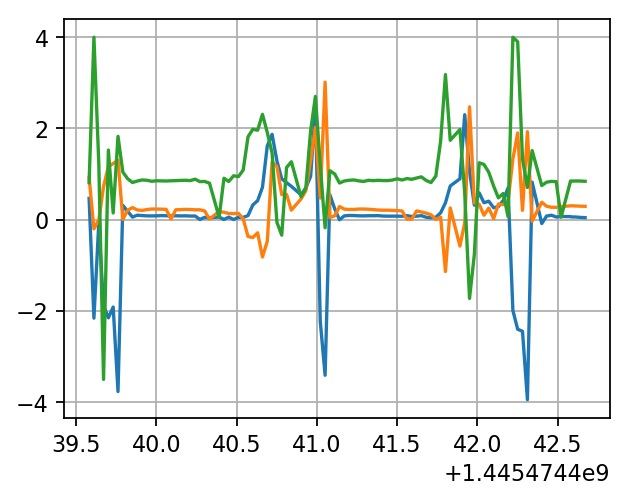

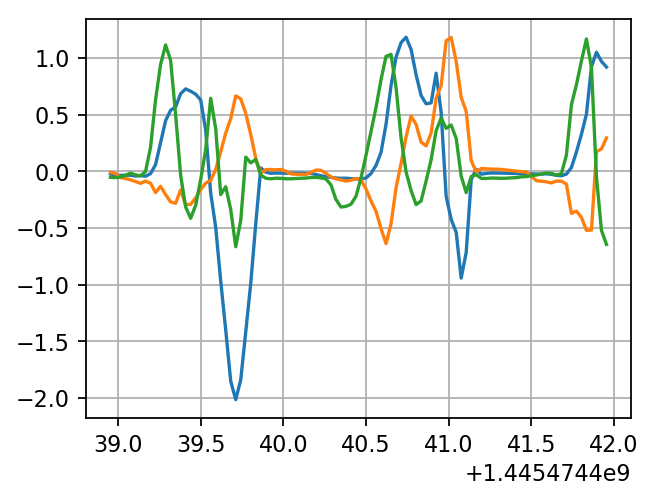

In [10]:
plt.figure(figsize=(4*1.1, 3*1.1), dpi=160)
[a.plot(200,300) for a in axis]
plt.show()

[emsa0.process(a) for a in axis]

plt.figure(figsize=(4*1.1, 3*1.1), dpi=160)
[a.plot(200,300) for a in axis]
plt.show()

In [9]:
search_order = 5
peaks_idx = np.array(signal.argrelmax(axis_lpf[0], order=search_order))
valleys_idx = np.array(signal.argrelmin(axis_lpf[0], order=search_order))

peaks_t = ts_new[peaks_idx]
valleys_t = ts_new[valleys_idx]
peaks = axis_lpf[0][peaks_idx]
valleys = axis_lpf[0][valleys_idx]

peaks_filt = np.nonzero(np.logical_and(peaks > 0.2, peaks < 4))
valleys_filt = np.nonzero(np.logical_and(valleys < -0.2, valleys > -4))

peaks_idx = peaks_idx[peaks_filt]
valleys_idx = valleys_idx[valleys_filt]
peaks_t = ts_new[peaks_idx]
valleys_t = ts_new[valleys_idx]
peaks = axis_lpf[0][peaks_idx]
valleys = axis_lpf[0][valleys_idx]


plt.figure(figsize=(4*1.1, 3*1.1), dpi=160)
plt.plot(ts_new, axis_lpf[0])
plt.plot(peaks_t, peaks, 'ro',ms=5)
plt.plot(valleys_t, valleys, 'go',ms=5)
plt.xlabel('Time (s)')
plt.ylabel('Magnitude')
#plt.title('Time Domain Signal (Axis ' + str(i + 1) + ')')
plt.title('Time Domain Signal')
for i in range(5,13):
    plt.text(peaks_t[i], peaks[i], "A", fontsize=12)

for i in range(5,12):
    plt.text(valleys_t[i], valleys[i], "B", fontsize=12)
    
plt.grid()
plt.xlim(10,30)
plt.show

NameError: name 'axis_lpf' is not defined

In [24]:
motifs = []
for i in range(len(peaks_idx)-1):
    motifs.append(Motif(ts_new[peaks_idx[i]:peaks_idx[i+1]], axis_lpf[0][peaks_idx[i]:peaks_idx[i+1]]))
plt.figure(figsize=(4*1.1, 3*1.1), dpi=160)
plt.grid()
for i in range(len(motifs)):
    motifs[i].plot()


NameError: name 'peaks_idx' is not defined